In [2]:
import pandas as pd
import json_lines
import re
import numpy as np

def read_data_from_jl(file_path):
    with open(file_path, 'rb') as f:
        data = json_lines.reader(f)

        df = pd.DataFrame(data)
        
        return df
    return None

In [3]:
df = read_data_from_jl('../data/alonhadat.jl')
df

,price,area,location,description,date,kind
0,6 triệu / tháng,40 m,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,Ngày đăng: Hôm qua,"Phòng trọ, nhà trọ"
1,37 triệu / tháng,200 m,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...","MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Ngày đăng: Hôm nay,Nhà mặt tiền
2,7 triệu / tháng,70 m,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...","Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Ngày đăng: Hôm nay,Mặt bằng
3,50 triệu / tháng,200 m,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...","MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Ngày đăng: Hôm nay,Nhà mặt tiền
4,4 triệu / tháng,30 m,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Ngày đăng: 17/10/2020,Căn hộ chung cư
...,...,...,...,...,...,...
26490,"5,5 triệu / tháng",50 m,"Đường Nguyễn Khang, Phường Yên Hòa, Quận Cầu ...","Chính chủ cho thuê CCMN, Studio ở Trung Kính, ...",Ngày đăng: 18/09/2020,Căn hộ chung cư
26491,15 triệu / tháng,55 m,"Phố Trần Đại Nghĩa, Phường Bách Khoa, Quận H...",Cho thuê nhà riêng tại ngõ trần đại nghĩa kéo ...,Ngày đăng: 20/09/2020,Nhà trong hẻm
26492,10 triệu / tháng,60 m,"Phố Trần Đại Nghĩa, Phường Đồng Tâm, Quận Ha...",Cho thuê nhà ngõ tự do kinh doanh hàng ăn uống...,Ngày đăng: 20/09/2020,Nhà trong hẻm
26493,17 triệu / tháng,60 m,"Phố Nguyên Hồng, Phường Láng Hạ, Quận Đống ...","Cần cho thuê nhà ngõ 34 Nguyễn Hồng, quận Đống...",Ngày đăng: 20/09/2020,Nhà trong hẻm


In [4]:
des = df['description'].values
price = df['price'].values
area = df['area'].values
kind = df['kind'].values
data = pd.DataFrame()

In [5]:
a = []
pattern = '([0-9]+,[0-9]+|[0-9]+)'
for p in price:
    result = re.findall(pattern, p)
    if result:
        a.append(float(result[0].replace(",", ".")))
    else:
        a.append(0)

data['Price'] = pd.Series(np.array(a), index=df.index)
data

,Price
0,6.0
1,37.0
2,7.0
3,50.0
4,4.0
...,...
26490,5.5
26491,15.0
26492,10.0
26493,17.0


In [6]:
data["Description"] = df['description']

In [7]:
a = []
pattern1 = '(CCMN|[Cc]hung cư)'
pattern2 = '[Hh]omestay'
for d in df['description'].values:
    d = str(d)
    ccmn = re.findall(pattern1, d)
    hs = re.findall(pattern2, d)
    if ccmn:
        a.append("CCMN")
    elif hs:
        a.append("Homestay")
    else:
        a.append("Phòng trọ")

data['Kind'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ


In [8]:
data['Location'] = df['location']
data.head(10)

,Price,Description,Kind,Location
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B..."
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ..."
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ..."
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ..."
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ..."
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ..."
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung..."
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn..."
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ..."
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ..."


In [9]:
b = []
pattern = '[0-9]+'
for a in area:
    result = re.findall(pattern, a)
    if result:
        b.append(int(result[0]))
    else:
        b.append(0)

data['Size'] = pd.Series(np.array(b), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60


In [10]:
# add parking area
a = []
pattern = '[Đđ]ể xe'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Parking_slot'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0


In [11]:
a = []
pattern = '[Đđ]iều hòa'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Air_condition'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0,1
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0,0
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0,0


In [12]:
a = []
pattern = '[Nn]óng lạnh'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Heater_shower'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0,0
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1,1
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0,1,1
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0,0,0
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0,0,0


In [13]:
a = []
pattern = '([Tt]ủ|[Ff]ull đồ|tivi|nội thất đầy đủ)'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Furnish'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1,1
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0,0,0
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0,0,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1,1
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1,1,1
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0,0,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0,1,1,1
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0,0,0,1
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0,0,0,0


In [14]:
a = []
pattern = 'khép kín'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Inner_toilet'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1,1,1
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0,0,0,0
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0,0,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0,0,0,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1,1,1
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1,1,1,0
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0,0,0,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0,1,1,1,1
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0,0,0,1,0
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0,0,0,0,0


In [15]:
a = []
pattern = '[Tt]ổng diện tích'
for d in des:
    d = str(d)
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Size_total_bool'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1,1,1,0
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0,0,0,0,0
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0,0,0,0
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0,0,0,0,0
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1,1,1,0
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1,1,1,0,0
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0,0,0,0,0
7,6.5,Tòa nhà chung cư mini 8 tầng đang hoàn thiện m...,CCMN,"Số 57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàn...",40,0,1,1,1,1,0
8,11.0,căn hộ cao cấp full nội thất\r\n-75m2– 2 ngủ f...,Phòng trọ,"Đường Thành Thái, Phường Dịch Vọng, Quận Cầu ...",75,0,0,0,1,0,0
9,10.0,Quản lý 100% căn hộ D2 Giảng Võ cho thuê.\r\nC...,Phòng trọ,"D2 Đường Giảng Võ, Phường Giảng Võ, Quận Ba Đ...",60,0,0,0,0,0,0


In [16]:
data['Source'] = "alonhadat"
data

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1,1,1,0,alonhadat
1,37.0,"MB Hợp Bia hơi, Bún Phở Phố Nguyễn Văn Tuyết -...",Phòng trọ,"Phố Nguyễn Văn Tuyết, Phường Ngã Tư Sở, Quậ...",200,1,0,0,0,0,0,alonhadat
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0,0,0,0,alonhadat
3,50.0,"MP lê Đức Thọ , Diện tích 200m2, 1 tầng, MT 8m...",Phòng trọ,"Đường Lê Đức Thọ, Phường Dịch Vọng Hậu, Quận ...",200,0,0,0,0,0,0,alonhadat
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1,1,1,0,alonhadat
...,...,...,...,...,...,...,...,...,...,...,...,...
26490,5.5,"Chính chủ cho thuê CCMN, Studio ở Trung Kính, ...",CCMN,"Đường Nguyễn Khang, Phường Yên Hòa, Quận Cầu ...",50,0,0,1,1,0,0,alonhadat
26491,15.0,Cho thuê nhà riêng tại ngõ trần đại nghĩa kéo ...,Phòng trọ,"Phố Trần Đại Nghĩa, Phường Bách Khoa, Quận H...",55,0,0,0,0,0,0,alonhadat
26492,10.0,Cho thuê nhà ngõ tự do kinh doanh hàng ăn uống...,Phòng trọ,"Phố Trần Đại Nghĩa, Phường Đồng Tâm, Quận Ha...",60,0,0,0,0,0,0,alonhadat
26493,17.0,"Cần cho thuê nhà ngõ 34 Nguyễn Hồng, quận Đống...",Phòng trọ,"Phố Nguyên Hồng, Phường Láng Hạ, Quận Đống ...",60,0,0,0,0,0,0,alonhadat


In [17]:
# data.to_csv("../processed-data/alonhadat.csv")

In [18]:
data['Price'].describe()

count    26495.000000
mean        54.773276
std         93.647494
min          0.000000
25%          9.000000
50%         18.000000
75%         55.000000
max        999.000000
Name: Price, dtype: float64

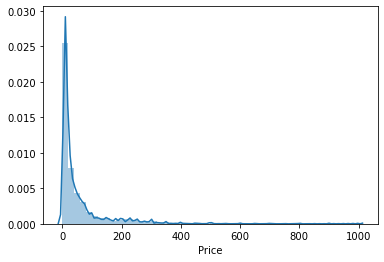

In [19]:
import seaborn as sns

sns.distplot(data['Price'])

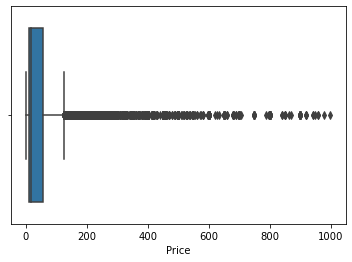

In [20]:
sns.boxplot(data["Price"])

In [21]:
new_data = data[data['Price'] < 15]
new_data

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,6.0,1- Tòa nhà chung cư mini 8 tầng đang hoàn thiệ...,CCMN,"57A NGÕ 221 Phố Tôn Đức Thắng, Phường Hàng B...",40,0,1,1,1,1,0,alonhadat
2,7.0,"Cho thuê mặt bằng tầng 1 làm VP CTY, kho hàng ...",Phòng trọ,"Đường Nguyễn Cơ Thạch, Phường Cầu Diễn, Quận ...",70,0,0,0,0,0,0,alonhadat
4,4.0,Căn hộ khép kín tại số 50 ngõ 322 đường Mỹ Đìn...,Phòng trọ,"Số nhà 5 ngõ 322/50 Đường Mỹ Đình, Phường Mỹ ...",30,1,1,1,1,1,0,alonhadat
5,9.0,Được sự đồng ý của chủ nhà và bạn quả lý tòa n...,CCMN,"Đường Hoàng Đạo Thúy, Phường Trung Hòa, Quận ...",76,0,1,1,1,0,0,alonhadat
6,12.0,"Thiết kế \r\n -Căn góc 120m2 3PN,2Wc 1Khach đầ...",Phòng trọ,"Đường Vũ Trọng Phụng, Phường Thanh Xuân Trung...",120,0,0,0,0,0,0,alonhadat
...,...,...,...,...,...,...,...,...,...,...,...,...
26484,9.0,"Cho thuê căn hộ Sudio 55m2, 1 phòng ngủ giá 9t...",CCMN,"Đường Châu Văn Liêm, Phường Phú Đô, Quận Nam ...",55,0,0,0,0,0,0,alonhadat
26486,11.0,Cho thuê căn hộ 3 phòng ngủ đủ đồ giá 11tr chu...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 2, Quận Nam T...",100,0,1,1,1,0,0,alonhadat
26489,3.0,Nhà tôi hiện có 8 phòng trọ mới xây cho thuê r...,Phòng trọ,"số 9, ngõ 93 Đường Bùi Xương Trạch, Phường Kh...",22,1,0,1,1,1,0,alonhadat
26490,5.5,"Chính chủ cho thuê CCMN, Studio ở Trung Kính, ...",CCMN,"Đường Nguyễn Khang, Phường Yên Hòa, Quận Cầu ...",50,0,0,1,1,0,0,alonhadat


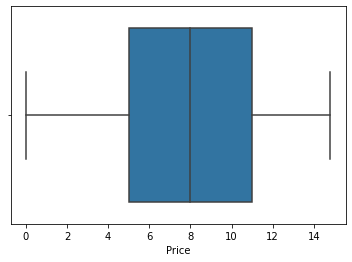

In [22]:
sns.boxplot(new_data["Price"])

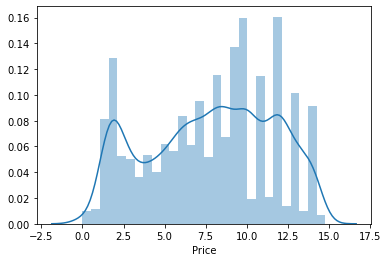

In [23]:
sns.distplot(new_data['Price'])

In [24]:
new_data.loc[new_data["Kind"] == "CCMN", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Heater_shower"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Inner_toilet"] = 1

new_data.loc[new_data["Kind"] == "Homestay", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Heater_shower"] = 1

In [25]:
new_data.to_csv('../processed-data/alonhadat.csv')